## Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [81]:
order=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
order

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Checking the Existence of Missing Values

In [19]:
order.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

#### There are no missing values.

## Exploratory Data Analysis

### Visualization of Average Order Amount by Different Payment Methods

Text(0.5, 1.0, 'Average Order Amount by Different Payment Methods')

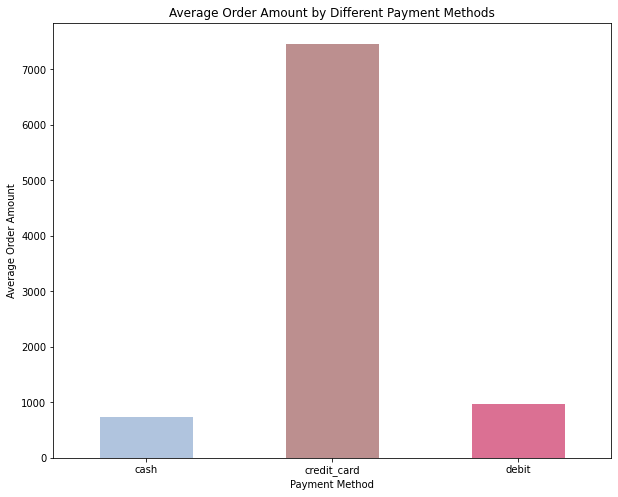

In [77]:
order.groupby('payment_method')['order_amount'].mean().plot.bar(color=['lightsteelblue','rosybrown','palevioletred'],figsize=(10,8))
plt.xlabel('Payment Method')
plt.ylabel('Average Order Amount')
plt.xticks(rotation='horizontal')
plt.title('Average Order Amount by Different Payment Methods')

#### From the bar graph, we can find out that the average orde amount is the highest for 'credit_card' payment method, which is far more higher than other two groups. And we can guess this may be related to credit card fraud, which needs further analysis.

### Anomaly Detection

#### Considering that sneaker is a household item, there may be potentially credit card fraud if one person buys a huge amount. Thus, I decided to sort by total_items to detect if there exists credit card fraud.

In [78]:
order.sort_values(by='total_items',ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
1408,1409,16,807,156,1,cash,2017-03-07 4:04:28
3367,3368,21,893,142,1,cash,2017-03-01 8:36:23
1410,1411,97,832,162,1,debit,2017-03-13 4:40:51
3364,3365,44,737,144,1,cash,2017-03-17 19:42:58


### Abnormal Transactions

In [79]:
# check the transactions of user with user_id '607' that is suspicious
order[order['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


#### Then I found that the shopper with user_id 607 is suspicious since from 2017-03-02 to 2017-03-28, the user bought 2000 sneakers with credit card from shop No.42 every time in different transactions. Even some transactions happened at the same time. e.g., order_id '521' and order_id'4647' were both created at 2017-03-02 4:00:00. This insight laid a foundation for further analysis.

## Question 1

 On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoes. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

 ### -a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### Interpretation of the Original AOV

In [16]:
original_AOV=sum(order.order_amount)/len(order.order_amount)
print(original_AOV)

3145.128


#### The original average order value provided above can be wrong in two aspects. First of all, it doesn't take the quantities of sneakers in one order into account. The order value can be very high if the quantity is large, thus it may not be a good metric to evaluate the values of sneakers. In this condition, we can consider average item value as an alternative metric. Besides, there may exist suspicious transactions which should be removed. And since these shops are selling relatively affordable sneakers, outliers in the prices of sneakers may not be considered.

 ### -b.What metric would you report for this dataset?  
 ### -c. What is its value?

### Method 1. Using Another Metric: AIV 

#### 1.1 AIV without Removing Outliers

In [99]:
item_value=[]
for i in range(0,len(order)):
    item_value.append(order.order_amount[i]/order.total_items[i])

order['item_value']=item_value         #add a new column                                
AIV=sum(item_value)/len(item_value)    #define AIV as the average item value 
print('The original average item value AIV is', AIV)

The original average item value AIV is 387.7428


#### 1.2 AIV after Removing Outliers

#### Detecting Outliers Using IQR Methods

In [100]:
print('The maximum item value is',max(item_value))

The maximum item value is 25725.0


In [101]:
print('The minimum item value is', min(item_value))

The minimum item value is 90.0


In [102]:
Q1=order['item_value'].quantile(0.25)
Q3=order['item_value'].quantile(0.75)
IQR=Q3-Q1                                       # calculate IQR which describes the middle 50% of values when ordered from lowest to highest
Lower_Whisker = Q1 - 3*IQR
Upper_Whisker = Q3 + 3*IQR
print(Lower_Whisker, Upper_Whisker)

25.0 277.0


##### The item values outside the range [25,277] are considered extreme outliers, which signify unusual prices for sneakers.

#### Printing the AIV after Removing Outliers

In [106]:
order_new=order[order['item_value']<Upper_Whisker]    #since the minimum AIV 90 is bigger than 25, we only need to consider the upper bound
order_new

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ave_item_value,item_value
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0,177.0


In [104]:
AIV_remove_outlier=sum(order_new.item_value)/len(order_new.item_value)
print('The average item value AIV is', AIV_remove_outlier)

The average item value AIV is 150.40016316540894


#### Conclusion: The first alternative metric is AIV, which calculates the average price of sneakers in different shops, given each of these shops sells only one model of shoe. This metric makes more sense to evaluate the values of sneakers. And there are two situations for this metric. In the first situation, I calculated AIV without removing outliers which signify unusual prices of sneakers. And the value of AIV in this situation is 387.7428. In the second situation, I calculated AIV after removing extreme outliers using IQR method, whose value is 150.40016316540894.

### Method 2. Using AOV after Removing Abnormal Transactions as Metric

In [107]:
# As mentioned before (the part of 'Anomaly Detection'), the user with user_id '607' is suspicious, and I decided to remove the abnormal transactions 
order_remove_anomaly=order[order['user_id']!= 607]
order_remove_anomaly

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ave_item_value,item_value
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0,177.0


In [108]:
AOV2=sum(order_remove_anomaly.order_amount)/len(order_remove_anomaly.order_amount)
print(AOV2)

754.0919125025085


#### Conclusion: The second alternative metric is AOV after removing abnormal transactions which may be related to credit card fraud. And the value of the metric is 754.0919125025085.

### Method 3. Using AOV after Removing Both Abnormal Transactions and Outliers as Metric

#### Detecting Outliers Using IQR Methods after Removing Abnormal Transactions 

In [115]:
Q1=order_remove_anomaly['item_value'].quantile(0.25)
Q3=order_remove_anomaly['item_value'].quantile(0.75)
IQR=Q3-Q1                                       # calculate IQR which describes the middle 50% of values when ordered from lowest to highest
Lower_Whisker = Q1 - 3*IQR
Upper_Whisker = Q3 + 3*IQR
print(Lower_Whisker, Upper_Whisker)

28.0 273.0


##### The item value outside the range [28,273] is considered an outlier.

In [117]:
order_remove_anomaly_outlier=order_remove_anomaly[order_remove_anomaly['item_value']<Upper_Whisker]
order_remove_anomaly_outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,ave_item_value,item_value
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0,177.0


#### Printing the AOV after Removing Both Abnormal Transactions and Outliers 

In [120]:
AOV3=sum(order_remove_anomaly_outlier.order_amount)/len(order_remove_anomaly_outlier.order_amount)

In [123]:
print('The average order value after removing both abnormal transactions and outliers which have abnormal prices of sneakers is :',AOV3)

The average order value after removing both abnormal transactions and outliers which have abnormal prices of sneakers is : 300.1558229655313


#### Conclusion: The third alternative metric is AOV after removing both abnormal transactions and outliers which show abnormal prices. And the value of the metric is 301.6780863571863.